<a href="https://colab.research.google.com/github/ilanamultak/siads_699_heart_disease/blob/main/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Setup

In [11]:
# build connection between colab and google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# define the current working directory
#import os
#os.chdir("/content/drive/My Drive/mads_capstone_project")
#cwd = os.getcwd()

Mounted at /content/drive


In [12]:
# Import necessary libraries
import os

# Clone the GitHub repository
# Replace 'your_github_repo_url' with the actual URL of your GitHub repository
!git clone https://github.com/ilanamultak/siads_699_heart_disease.git

# Change the working directory to the cloned repository
os.chdir('/content/siads_699_heart_disease')

# Verify the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)


fatal: destination path 'siads_699_heart_disease' already exists and is not an empty directory.
Current working directory: /content/siads_699_heart_disease


In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Data Descriptions

In [14]:
# Print data descriptions
with open('data/heart-disease.names', 'r') as file:
  content = file.read()

print(content)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

# Processed Cleveland Data

In [15]:
# Processed Cleveland Data
df = pd.read_csv('data/processed.cleveland.data', header=None)
df.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","heart_disease"]
df = df.replace(-9.0,np.nan)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [17]:
# How many NULL values in each column
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# Combined Raw Data

## Attempt at cleaning new.data (LEAVE THIS CLOSED FOR NOW)

It appears this table contains all the combined raw data from the 4 data sources. Unfortunately, it cannot be used because it contains 90 columns, where there is only documentation around 76 columns. The other non-combined raw tables each have 76 columns. We can try to manually pick out the 76 relevant columns, but that would be pretty tough to do.

raw_columns = [
  "id", "ccf", "age", "sex", "painloc", "painexer", "relrest", "pncaden", "cp",
  "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist",
  "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic",
  "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps",
  "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope",
  "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref",
  "exerwm", "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num",
  "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox",
  "rcadist", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "name"
]

-# Read the file content
file_path = 'data/new.data'
with open(file_path, 'r') as file:
  lines = file.read().split()

print(lines)

df = pd.DataFrame(columns=raw_columns)
row = []
for val in lines:
  if val.isalpha():
    row.append(val)
    df.loc[len(df)] = row
    row = []
  else:
    row.append(val)

df.head()

## Combining Raw Data from Switzerland, Hungary, and Long Beach

We can only combine the raw data from Switzerland, Hungary, and Long Beach sources because the Cleveland data file was corrupted (documentation around why can be found in the "heart_disease/WARNING" file)

In [18]:
raw_columns = [
  "id", "ccf", "age", "sex", "painloc", "painexer", "relrest", "pncaden", "cp",
  "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist",
  "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic",
  "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps",
  "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope",
  "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref",
  "exerwm", "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num",
  "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox",
  "rcadist", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "name", "data_source"
]

data_sources = {"hungary":"data/hungarian.data","switzerland":"data/switzerland.data","long_beach":"data/long-beach-va.data"}

In [19]:
# Consolidate raw data from the 3 sources into one dataframe
df = pd.DataFrame(columns=raw_columns)

for data_source_name, data_source_path in data_sources.items():
  file_path = data_source_path
  with open(file_path, 'r') as file:
    text = file.read().split()

  temp_df = pd.DataFrame(columns=raw_columns)
  row = []
  for val in text:
    if val.isalpha():
      row.append(val)
      row.append(data_source_name)
      temp_df.loc[len(temp_df)] = row
      row = []
    else:
      row.append(val)
  df = pd.concat([df, temp_df], axis=0)

df[raw_columns[:-2]] = df[raw_columns[:-2]].astype(float)
df = df.replace(-9.0,np.nan)
df.head()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name,data_source
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungary
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungary
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungary
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungary
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name,hungary


In [20]:
pd.set_option('display.max_columns', None)
df.describe()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
count,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,613.000000,0.0,617.000000,558.000000,583.000000,587.000000,230.000000,202.000000,190.000000,527.000000,72.000000,195.000000,615.000000,564.000000,563.000000,564.000000,551.000000,553.000000,554.000000,556.000000,537.000000,505.000000,561.000000,233.000000,512.000000,562.000000,561.000000,554.000000,554.000000,558.000000,558.000000,562.000000,559.000000,555.000000,309.000000,474.000000,475.000000,11.000000,0.0,1.0,28.000000,30.000000,2.000000,5.000000,142.000000,130.000000,44.000000,1.0,606.000000,608.000000,608.000000,617.000000,342.000000,381.000000,371.000000,341.000000,382.000000,332.000000,346.000000,327.000000,372.000000,347.000000,598.000000,598.000000,598.000000,598.000000,601.000000,311.000000,119.000000
mean,1325.489465,0.0,53.055105,0.842788,0.920583,0.593193,0.672104,NaN,3.294976,132.372760,0.408233,174.579216,0.517391,22.133663,23.952632,0.176471,0.944444,0.482051,0.414634,5.758865,15.628774,84.934397,0.036298,0.256781,0.276173,0.208633,0.111732,57.229703,8.775223,6.428755,20.189648,131.042705,75.673797,173.465704,91.644404,132.372760,82.804659,0.423488,0.028623,0.790991,1.932039,14.398734,14.145263,1.545455,NaN,0.0,0.531071,1.033333,0.550000,0.200000,5.690141,1.284615,0.295455,0.0,5.993399,16.286184,84.550987,1.230146,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.470430,1.207493,1.030100,1.048495,1.132107,1.705686,1.194676,27.623119,5.869748
std,1294.916561,0.0,9.582869,0.364296,0.270607,0.491637,0.469830,NaN,0.913743,19.828097,0.491929,124.349962,0.500787,16.146930,16.428871,0.381582,0.230669,0.500964,0.611066,3.306489,8.804259,1.123440,0.187200,1.013976,0.447508,0.406697,0.315330,52.784478,4.206623,4.299778,37.762087,25.151341,15.183479,26.601875,13.464101,19.828097,10.558013,0.494551,0.166893,1.041776,0.585465,5.702942,5.697171,2.621589,NaN,NaN,0.146195,1.066200,0.070711,0.447214,1.795120,0.958314,0.461522,NaN,3.336246,8.866408,5.140596,1.263447,8.706091,0.499399,0.449764,0.402339,0.490647,0.318847,0.391167,0.250887,0.499797,0.406097,0.336148,0.503910,0.673205,1.834072,0.541946,31.675295,1.650914
min,1.000000,0.0,28.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,60.000000,37.000000,100.000000,11.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000,2.000000,2.000000,0.000000,NaN,0.0,0.220000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.220000,3.300000
25%,157.000000,0.0,47.000000,1.000000,1.000000,0.000000,0.000000,NaN,3.000000,120.000000,0.000000,0.000000,0.000000,15.000000,8.500000,0.000000,1.000000,0.000000,0.000000,3.000000,8.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.500000,5.000000,114.250000,65.000000,158.000000,80.000000,120.000000,80.000000,0.000000,0.000000,0.000000,2.000000,10.000000,10.000000,0.000000,NaN,0.0,0.407500,0.000000,0.525000,0.000000,4.250000,0.000000,0.000000,0.0,3.000000,9.000000,84.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.685000,4.800000
50%,1120.000000,0.0,54.000000,1.000000,1.000000,1.000000,1.

In [21]:
# What percentage of values in each column are NULL?
pd.set_option('display.max_rows', None)
df.isnull().sum()/len(df)

,0
id,0.000000
ccf,0.000000
age,0.000000
sex,0.000000
painloc,0.000000
painexer,0.000000
relrest,0.006483
pncaden,1.000000
cp,0.000000
trestbps,0.095624


In [22]:
# Initial selection of features for model
# Starting off with features that are present in >80% of rows and realistically make sense to include
cols_to_keep = [
    "age","sex","painloc","painexer","relrest","cp","trestbps","htn","chol","fbs","restecg",
    "dig","prop","nitr","pro","diuretic","thaldur","met","thalach","thalrest","tpeakbps",
    "tpeakbpd","trestbpd","exang","xhypo","oldpeak","num"
]

# Columns in <80% of rows but with enough data that'd be interesting to explore
# cols_to_explore = ['smoke','cigs','years','famhist','slope','rldv5','rldv5e']

#df = old_df
old_df = df.copy()
df = df[cols_to_keep].dropna().reset_index(drop=True)
cols_to_rename = {'num':'heart_disease'}
df.rename(columns=cols_to_rename, inplace=True)

# Make heart_disease column binary - either they have heart disease (1) or they don't (0)
df.loc[df['heart_disease'] > 0, 'heart_disease'] = 1

# Create dummy variables for chest pain categories
df.loc[df['cp'] == 1, 'cp_angina_typ'] = 1
df['cp_angina_typ'] = df['cp_angina_typ'].fillna(0)
df.loc[df['cp'] == 2, 'cp_angina_atyp'] = 1
df['cp_angina_atyp'] = df['cp_angina_atyp'].fillna(0)
df.loc[df['cp'] == 3, 'cp_non_anginal'] = 1
df['cp_non_anginal'] = df['cp_non_anginal'].fillna(0)
df.loc[df['cp'] == 4, 'cp_asymptomatic'] = 1
df['cp_asymptomatic'] = df['cp_asymptomatic'].fillna(0)
df.drop('cp', axis=1, inplace=True)

# Create dummy variables for resting ECG categories
df.loc[df['restecg'] == 0, 'restecg_normal'] = 1
df['restecg_normal'] = df['restecg_normal'].fillna(0)
df.loc[df['restecg'] == 1, 'restecg_stt_wave'] = 1
df['restecg_stt_wave'] = df['restecg_stt_wave'].fillna(0)
df.loc[df['restecg'] == 2, 'restecg_lvh'] = 1
df['restecg_lvh'] = df['restecg_lvh'].fillna(0)
df.drop('restecg', axis=1, inplace=True)

In [23]:
df.head()

,age,sex,painloc,painexer,relrest,trestbps,htn,chol,fbs,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,heart_disease,cp_angina_typ,cp_angina_atyp,cp_non_anginal,cp_asymptomatic,restecg_normal,restecg_stt_wave,restecg_lvh
0,40.0,1.0,1.0,0.0,0.0,140.0,0.0,289.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,172.0,86.0,200.0,110.0,86.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49.0,0.0,1.0,0.0,0.0,160.0,1.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,156.0,100.0,220.0,106.0,90.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,37.0,1.0,1.0,0.0,0.0,130.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,98.0,58.0,180.0,100.0,80.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,48.0,0.0,1.0,1.0,1.0,138.0,0.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,108.0,54.0,210.0,106.0,86.0,1.0,0.0,1.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,39.0,1.0,1.0,0.0,1.0,120.0,0.0,339.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,8.0,170.0,86.0,198.0,100.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
df.describe()

,age,sex,painloc,painexer,relrest,trestbps,htn,chol,fbs,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,heart_disease,cp_angina_typ,cp_angina_atyp,cp_non_anginal,cp_asymptomatic,restecg_normal,restecg_stt_wave,restecg_lvh
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,51.749386,0.813268,0.936118,0.592138,0.651106,133.353808,0.398034,205.830467,0.142506,0.031941,0.248157,0.265356,0.176904,0.130221,8.980098,16.926536,131.353808,76.007371,174.572482,92.243243,83.572482,0.447174,0.019656,0.778870,0.560197,0.034398,0.230958,0.164619,0.570025,0.690418,0.243243,0.066339
std,9.585040,0.390176,0.244844,0.492042,0.477207,18.084711,0.490095,107.195752,0.349999,0.176060,1.151072,0.442066,0.382057,0.336961,4.419088,33.854701,25.304795,15.215284,25.338964,13.314213,9.546827,0.497814,0.138986,1.028125,0.496974,0.182474,0.421964,0.371293,0.495682,0.462890,0.429569,0.249180
min,28.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,60.000000,37.000000,110.000000,11.000000,50.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,1.000000,1.000000,0.000000,0.000000,120.000000,0.000000,184.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,112.500000,65.000000,160.000000,80.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,1.000000,1.000000,1.000000,130.000000,0.000000,224.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,130.000000,74.000000,172.000000,90.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,58.000000,1.000000,1.000000,1.000000,1.000000,142.000000,1.000000,268.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,8.000000,150.000000,84.500000,190.000000,100.000000,90.000000,1.000000,0.000000,1.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000,603.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,24.000000,200.000000,190.000000,134.000000,240.000000,134.000000,120.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Split data into train and test
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Standardize values for all numerical data in X
cols_for_standardization = ['age','trestbps','chol','thaldur','met','thalach','thalrest','tpeakbps','tpeakbpd','trestbpd','oldpeak']
scaler = StandardScaler()
X_train[cols_for_standardization] = scaler.fit_transform(X_train[cols_for_standardization])
X_test[cols_for_standardization] = scaler.fit_transform(X_test[cols_for_standardization])

# Logisitic Regression
clf_lr = LogisticRegression(random_state=27)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest
clf_rf = RandomForestClassifier(random_state=27)
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [26]:
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Random Forest Accuracy: {accuracy_rf}")

Logistic Regression Accuracy: 0.7682926829268293
Random Forest Accuracy: 0.7195121951219512


In [27]:
# Show feature importance for Logisitic Regression
coefs_lr = clf_lr.coef_[0]
features_lr = X_train.columns

feature_importance_lr = pd.DataFrame({
    'feature': features_lr,
    'coef': coefs_lr,
    'abs_coef': np.abs(coefs_lr)
}).sort_values(by='abs_coef', ascending=False).reset_index().drop('index',axis=1)

feature_importance_lr

,feature,coef,abs_coef
0,sex,1.440663,1.440663
1,fbs,1.045044,1.045044
2,pro,1.022984,1.022984
3,exang,0.999935,0.999935
4,cp_angina_atyp,-0.909280,0.909280
5,oldpeak,0.822548,0.822548
6,met,0.778490,0.778490
7,xhypo,0.627464,0.627464
8,cp_angina_typ,0.626809,0.626809
9,painexer,0.448870,0.448870


In [28]:
# Show feature importance for Random Forest
importances_rf = clf_rf.feature_importances_
features_rf = X_train.columns

feature_importance_rf = pd.DataFrame({
    'feature': features_rf,
    'importance': importances_rf
}).sort_values(by='importance', ascending=False).reset_index().drop('index',axis=1)

feature_importance_rf

,feature,importance
0,age,0.077198
1,exang,0.074662
2,thalach,0.072153
3,cp_angina_atyp,0.071298
4,cp_asymptomatic,0.062627
5,oldpeak,0.062298
6,thaldur,0.057475
7,chol,0.055813
8,thalrest,0.050482
9,painexer,0.049570


In [29]:
compare_feature_importance_rankings = pd.DataFrame({
    'logistic_regression': feature_importance_lr['feature'],
    'random_forest': feature_importance_rf['feature']
})

compare_feature_importance_rankings

,logistic_regression,random_forest
0,sex,age
1,fbs,exang
2,pro,thalach
3,exang,cp_angina_atyp
4,cp_angina_atyp,cp_asymptomatic
5,oldpeak,oldpeak
6,met,thaldur
7,xhypo,chol
8,cp_angina_typ,thalrest
9,painexer,painexer


# Adding - Possible Changes

In [30]:
# Split data into train and test
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# ADDED: stratify = y, possibly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

# Standardize values for all numerical data in X
cols_for_standardization = ['age','trestbps','chol','thaldur','met','thalach','thalrest','tpeakbps','tpeakbpd','trestbpd','oldpeak']
scaler = StandardScaler()
# EDITED: just transform used for X_test
X_train[cols_for_standardization] = scaler.fit_transform(X_train[cols_for_standardization])
X_test[cols_for_standardization] = scaler.transform(X_test[cols_for_standardization])

In [31]:
# Logistic Regression - trying different solvers

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

def log_reg_solver(s):
  clf = LogisticRegression(solver = s, random_state=27)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("solver: ", s)
  print("Logistic Regression Accuracy is:", accuracy)

for x in solvers:
  log_reg_solver(x)

solver:  lbfgs
Logistic Regression Accuracy is: 0.8048780487804879
solver:  liblinear
Logistic Regression Accuracy is: 0.8048780487804879
solver:  newton-cg
Logistic Regression Accuracy is: 0.8048780487804879
solver:  newton-cholesky
Logistic Regression Accuracy is: 0.8048780487804879
solver:  sag
Logistic Regression Accuracy is: 0.8048780487804879
solver:  saga
Logistic Regression Accuracy is: 0.8170731707317073


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(random_state=27)
clf_gb.fit(X_train, y_train)

y_pred_gb = clf_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

Gradient Boosting Accuracy: 0.7926829268292683


In [33]:
# XGBoost
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(random_state=27)
clf_xgb.fit(X_train, y_train)

y_pred_xgb = clf_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.8170731707317073


In [34]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
clf_svm = SVC(random_state=27)
clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine: {accuracy_svm}")

Support Vector Machine: 0.8048780487804879


# Cross-validation

In [35]:
from sklearn.model_selection import cross_val_score

def cross_validation(model, scoring):
  score = cross_val_score(model, X, y, cv = 5, scoring = scoring)
  mean_cv_score = score.mean()
  return mean_cv_score

clf_lst = {'Logistic Regression': clf_lr,
           'Random Forest': clf_rf,
           'Gradient Boosting': clf_gb,
           'XGBoost': XGBClassifier(random_state=27),
           'Support Vector Machine': SVC(random_state=27),
}

results = []
score_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc_ovr']

for name, clf in clf_lst.items():
  result = {'Model': name}
  for metric in score_metrics:
    result[metric] = cross_validation(clf, metric)
  results.append(result)

results_df = pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [36]:
results_df.sort_values(by = 'accuracy', ascending = False)

,Model,accuracy,precision,recall,f1,roc_auc_ovr
1,Random Forest,0.806022,0.835265,0.842705,0.828335,0.880037
0,Logistic Regression,0.798645,0.849196,0.803285,0.816401,0.879221
3,XGBoost,0.796025,0.828760,0.833816,0.821084,0.865972
2,Gradient Boosting,0.783860,0.834358,0.794203,0.800069,0.862311
4,Support Vector Machine,0.695724,0.741281,0.703671,0.707715,NaN


Random Forest and Logistic Regression seems to have the highest accuracy.

# Hypertuning Parameters

In [37]:
# Logistic Regression: Cross-validation and Hyper-tuning
# different solvers

LR_solvers = {
    'Logistic Regression - lbfgs': LogisticRegression(solver = 'lbfgs', random_state=27),
    'Logistic Regression - liblinear': LogisticRegression(solver = 'liblinear', random_state=27),
    'Logistic Regression - newton-cg': LogisticRegression(solver = 'newton-cg', random_state=27),
    'Logistic Regression - newton-cholesky': LogisticRegression(solver = 'newton-cholesky', random_state=27),
    'Logistic Regression - sag': LogisticRegression(solver = 'sag', random_state=27),
    'Logistic Regression - saga': LogisticRegression(solver = 'saga', random_state=27)
}

LR_results = []

for name, clf in LR_solvers.items():
  LR_results = {'Model': name}
  for metric in score_metrics:
    LR_results[metric] = cross_validation(clf, metric)
  results.append(LR_results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [38]:
# Evaluation metrics table for all models
LR_results_df = pd.DataFrame(results)
LR_results_df

,Model,accuracy,precision,recall,f1,roc_auc_ovr
0,Logistic Regression,0.798645,0.849196,0.803285,0.816401,0.879221
1,Random Forest,0.806022,0.835265,0.842705,0.828335,0.880037
2,Gradient Boosting,0.783860,0.834358,0.794203,0.800069,0.862311
3,XGBoost,0.796025,0.828760,0.833816,0.821084,0.865972
4,Support Vector Machine,0.695724,0.741281,0.703671,0.707715,NaN
5,Logistic Regression - lbfgs,0.798645,0.849196,0.803285,0.816401,0.879221
6,Logistic Regression - liblinear,0.825715,0.849259,0.855845,0.842543,0.884253
7,Logistic Regression - newton-cg,0.820837,0.844497,0.851498,0.837997,0.884755
8,Logistic Regression - newton-cholesky,0.820837,0.844497,0.851498,0.837997,0.884755
9,Logistic Regression - sag,0.658747,0.751799,0.632271,0.657424,0.722491


In [39]:
# Sort by highest accuracy
LR_results_df.sort_values(by = 'accuracy', ascending = False)

,Model,accuracy,precision,recall,f1,roc_auc_ovr
6,Logistic Regression - liblinear,0.825715,0.849259,0.855845,0.842543,0.884253
7,Logistic Regression - newton-cg,0.820837,0.844497,0.851498,0.837997,0.884755
8,Logistic Regression - newton-cholesky,0.820837,0.844497,0.851498,0.837997,0.884755
1,Random Forest,0.806022,0.835265,0.842705,0.828335,0.880037
0,Logistic Regression,0.798645,0.849196,0.803285,0.816401,0.879221
5,Logistic Regression - lbfgs,0.798645,0.849196,0.803285,0.816401,0.879221
3,XGBoost,0.796025,0.828760,0.833816,0.821084,0.865972
2,Gradient Boosting,0.783860,0.834358,0.794203,0.800069,0.862311
4,Support Vector Machine,0.695724,0.741281,0.703671,0.707715,NaN
9,Logistic Regression - sag,0.658747,0.751799,0.632271,0.657424,0.722491


From the table, it seems Logistic Regression with liblinear solver is the highest, followed by Random Forest.

In [40]:
# Random Forest: Cross-validation and Hyper-tuning

from sklearn.model_selection import GridSearchCV

param_grid_rf = {'n_estimators': [50, 100, 200, 300],
                  'max_features': ['auto', 'sqrt'],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'bootstrap': [True, False]}

clf_rf = RandomForestClassifier(random_state = 27)
#score = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
grid_search_rf = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
531 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=27), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [41]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [42]:
grid_search_rf.best_score_

0.8246153846153847

In [43]:
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=27)

In [44]:
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8170731707317073

# Visualizations

#### Feature Importance

#### Comparing Model Evaluation
(accuracy, recall, precision, and F1-scores)

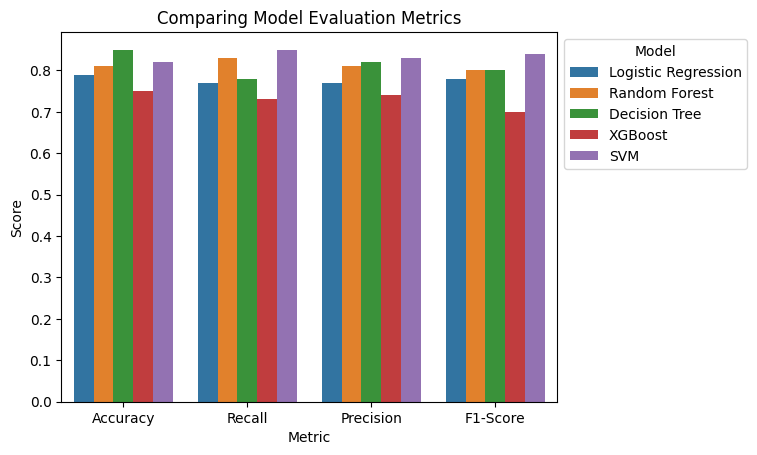

In [45]:
placeholder_data = {
  'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'SVM'],
  'Accuracy': [0.79, 0.81, 0.85, 0.75, 0.82],
  'Recall': [0.77, 0.83, 0.78, 0.73, 0.85],
  'Precision': [0.77, 0.81, 0.82, 0.74, 0.83],
  'F1-Score': [0.78, 0.80, 0.80, 0.70, 0.84]
}
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
model_eval_df = pd.DataFrame(placeholder_data).melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

sns.barplot(x='Metric', y='Score', hue='Model', data=model_eval_df)
plt.title('Comparing Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model', loc='best', bbox_to_anchor=(1, 1))
plt.show()

#### Confusion matrix for the best model
(True positives, true negatives, false positives, and false negatives)



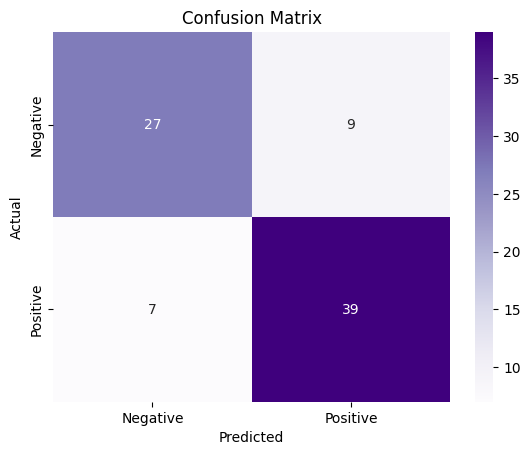

In [46]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm,
            annot=True,
            cmap='Purples', # change to color of winning model
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()